Plasmonic polarization conversion
====================================
*01/2021: updated to pyGDM v1.1+*

In this example, we demonstrate polarization conversion from a plasmonic L-shaped dimer antenna (see e.g. [1-2]).


[1] Black, L.-J. et al. *Optimal Polarization Conversion in Coupled Dimer Plasmonic Nanoantennas for Metasurfaces*. **ACS Nano** 8, 6390–6399 (2014) (http://dx.doi.org/10.1021/nn501889s)

[2] Wiecha, P. R. et al. *Polarization conversion in plasmonic nanoantennas for metasurfaces using structural asymmetry and mode hybridization*. **Scientific Reports** 7, 40906 (2017)
 (http://dx.doi.org/10.1038/srep40906)
 

Simulation setup
--------------------

structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 252/252 dipoles valid


/home/hans/.local/lib/python3.8/site-packages/pyGDM2/visu.py:49: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


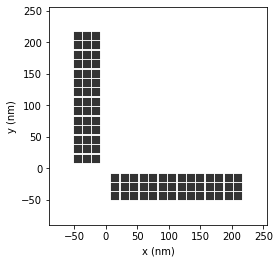

In [1]:
## --- load the modules
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import propagators
from pyGDM2 import tools
from pyGDM2 import linear
from pyGDM2 import visu

import numpy as np
import matplotlib.pyplot as plt


## --- Setup structure
mesh = 'cube'
step = 15.0
geometry = structures.lshape_rect_nonsym(step, 
                            L1=14,W1=3, L2=14,W2=3, H=3, DELTA=1, mesh=mesh)
material = materials.gold()
struct = structures.struct(step, geometry, material)

## --- Setup environment (vacuum)
dyads = propagators.DyadsQuasistatic123(n1=1, n2=1)

## --- Setup incident field
field_generator = fields.planewave        # planwave excitation
wavelengths = np.linspace(600, 1500, 45)  # spectrum
kwargs = dict(theta = [0.0])
efield = fields.efield(field_generator, wavelengths=wavelengths, kwargs=kwargs)


## --- Simulation initialization
sim = core.simulation(struct, efield, dyads)


## --- plot structure top view
st = visu.structure(sim.struct.geometry, scale=1)

Polarization resolved scattering
---------------------------------------

Now we run the main simulation of the spectrum (*core.scatter*), the we post-process it using *linear.farfield* adding the polarization filter parameter.

Our incident plane wave is polarized along *X* (0°), so we assess the polarization conversion of the plasmonic structure via the scattered **E**-field polarized along *Y* (90°).

In [2]:
## --- run main simulation
sim.scatter(verbose=False)


## --- polarization filtered scattering spectra
## total scat. (no filter)
kwargs = dict(polarizerangle='none', return_value='int_Es')
wl, spec_farfield = tools.calculate_spectrum(sim, 0, linear.farfield, **kwargs)

## scat. polarized along X
kwargs = dict(polarizerangle=0, return_value='int_Es')
wl, spec_farfield0 = tools.calculate_spectrum(sim, 0, linear.farfield, **kwargs)

## scat. polarized along Y
kwargs = dict(polarizerangle=90, return_value='int_Es')
wl, spec_farfield90 = tools.calculate_spectrum(sim, 0, linear.farfield, **kwargs)

/home/hans/.local/lib/python3.8/site-packages/numba/core/dispatcher.py:237: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ValueError(No function '__pyx_fuse_0pdtr' found in __pyx_capi__ of 'scipy.special.cython_special')'.
  entrypoints.init_all()


Plot the results
--------------------

Finally, we plot everything. We compare the total scattering (no pol. filter) with the non-coverted field components (filter along *X*) and with polarization conversion (filter along *Y*):

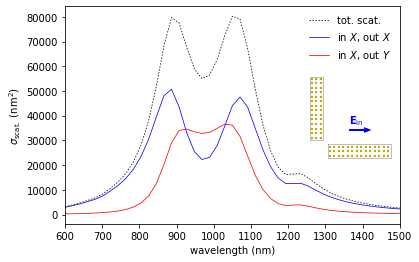

In [3]:
plt.figure()

plt.plot(wl, spec_farfield, 'k--', lw=0.75, dashes=[2,2], label='tot. scat.')
plt.plot(wl, spec_farfield0, 'b', lw=0.75, label=r'in $X$, out $X$')
plt.plot(wl, spec_farfield90, 'r', lw=0.75, label=r'in $X$, out $Y$')

plt.legend(loc='best', frameon=0)
plt.xlabel("wavelength (nm)")
plt.ylabel(r"$\sigma_{\mathsf{scat.}}$ (nm$^2$)")
plt.xlim([600,1500])


## --- inset for structure geometry
plt.axes([0.63,0.34, 0.31,0.31], aspect='equal')
plt.axis('off')

visu.structure(sim, scale=0.5, show=False, color="#c7a800")
visu.structure_contour(sim, lw=0.5, color='.5', show=False, borders=10)

plt.text(105, 50, r"$\mathbf{E}_{\mathsf{in}}$", ha='center', va='bottom', color='b')
plt.arrow( 80, 40, 50, 0, width=2, head_width=15, head_length=20, color='b', clip_on=False)


plt.show()

In agreement with the above publications, optimum polarization conversion occurs inbetween the eigenmodes of the L-shaped antenna (the eigenmodes are the resonances corresponding to the two peaks in the total scattering).